In [1]:
import wrangle as w
import pandas as pd
import explore as e
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings


In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Let the judgement begin
![Judge Ru presiding](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWY0NzEwOGNhNDBlYTRhMDRmY2FiMzIyMmMzZGQ0MzEwNDQwZDBlNSZjdD1n/MbgUbPUSiuaZy/giphy.gif)

RuPaul's Drag Race is a competition reality show which began airing in 2009 on LogoTV, a small premium cable channel geared towards LGBTQ+ audiences. Since then, it has become an international phenomenon, winning multiple Emmy award and spawning multiple spinoffs and international versions. It has moved channels twice, first to VH1, and then to its current home on MTV, where it is now airing its fifteenth season. Winners of the show have toured internationally, [starred on Broadway in Drag](https://www.forbes.com/sites/jerylbrunner/2023/02/13/jinkx-monsoon-makes-a-big-splash-on-broadway-in-chicago/?sh=d9ebd493e4e2) and even gone on to host international versions of the show. The show has pretty much singlehandedly catapulted drag into the spotlight and given wider visibility to this distinctly queer artform.

In case that introduction wasn't clear, I'm a **HUGE** fan of the show. I have seen every season from 3 onward, have a frankly alarming amount of merch from my favorite queens, and have seen more of them than I can count live. I've had my own intuitive methods of attempting to divine the winning queen. However, as my crystal ball is in the shop, I'm going to try to see if I can build a predictive model to figure it out for me! 
## Will Woody be able to crack the code and predict the next winner?

![idk](https://c.tenor.com/0tntfvosClgAAAAC/alaska-rpdr.gif)

But whatever happens, it should be sickening the house down boots yas gawd mama ockurrrr

# Mini Challenge - Acquisitiion and Preparation

In [17]:
reload(w)
queens, queeneps, episodes =  w.get_show_data(True)


## Acquiring the data
- Data from the original show and 7 different international spinoffs (see below for complete list) was collected from Wikipedia using Beautiful Soup.


In [18]:
reload(e)
e.series_markdown(episodes)

- Rupaul's Drag Race (seasons 1-14)

- Drag Race UK (seasons 1-4)

- Canada's Drag Race (seasons 1-3)

- Drag Race Down Under (seasons 1-2)

- Drag Race España (seasons 1-2)

- Drag Race Holland (seasons 1-2)

- Drag Race Italia (seasons 1-2)

- Drag Race France (season 1)



- Data was collected in 3 parts from 3 different tables on each season's page:
    - `queens`: data detailing the series the queen participated in, as well as name, age, hometown, and their placement in the season
    - `episodes`: data detailing the episodes, including the series, season, and episode, its air date, and, where applicable information about the mini challenge, mini challenge winner, main/maxi challenge, and runway theme
    - `queeneps`: Data detailing the performance of each queen per episode. This also includes the series, season, and episode, in addition to their placement in each episode

In [19]:
queens.head()

,queen_name,age,series,season,placement,city,region,relative_placement,winner
0,BeBe Zahara Benet,28,Rupaul's Drag Race,1,1,Minneapolis,Minnesota,1.000000,True
1,Nina Flowers,34,Rupaul's Drag Race,1,2,Denver,Colorado,0.888889,False
2,Rebecca Glasscock,26,Rupaul's Drag Race,1,3,Fort Lauderdale,Florida,0.777778,False
3,Shannel,29,Rupaul's Drag Race,1,4,Las Vegas,Nevada,0.666667,False
4,Ongina,26,Rupaul's Drag Race,1,5,Los Angeles,California,0.555556,False


Outcome Code | Meaning
---|---
SAFE | Queen was designated safe
WIN | Queen won the week's maxi-challenge
BTM | Queen lip synced for their life, but was not eliminated
ELIM | Queen was eliminated from the competition
DISQ | Queen was disqualified from further participation in the competition

The data was then split between train, validate, and test on each of the queens 

In [21]:
reload(w)

train, test = w.split_queens(queens, queeneps, episodes)


In [22]:
train.head()

,queen_name,age,series,season,placement,city,region,relative_placement,winner,episode,outcome,minichalw,episode_name,air_date,summary,mini_challenge,main_challenge,mini_challenge_winner,runway_theme
0,Alaska,27,Rupaul's Drag Race,5,2,Pittsburgh,Pennsylvania,0.928571,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
1,Ivy Winters,26,Rupaul's Drag Race,5,7,New York City,New York,0.571429,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
2,Lineysha Sparx,24,Rupaul's Drag Race,5,9,San Juan,Puerto Rico,0.428571,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
3,Jade Jolie,25,Rupaul's Drag Race,5,8,Gainesville,Florida,0.500000,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
4,Coco Montrese,37,Rupaul's Drag Race,5,5,Las Vegas,Nevada,0.714286,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1863
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   queen_name             1864 non-null   object        
 1   age                    1864 non-null   uint16        
 2   series                 1864 non-null   object        
 3   season                 1864 non-null   uint8         
 4   placement              1864 non-null   int8          
 5   city                   1864 non-null   object        
 6   region                 1864 non-null   object        
 7   relative_placement     1864 non-null   float64       
 8   winner                 1864 non-null   bool          
 9   episode                1864 non-null   uint8         
 10  outcome                1864 non-null   category      
 11  episode_name           1864 non-null   object        
 12  air_date               1864 non-null   datetime64[ns]
 13  sum

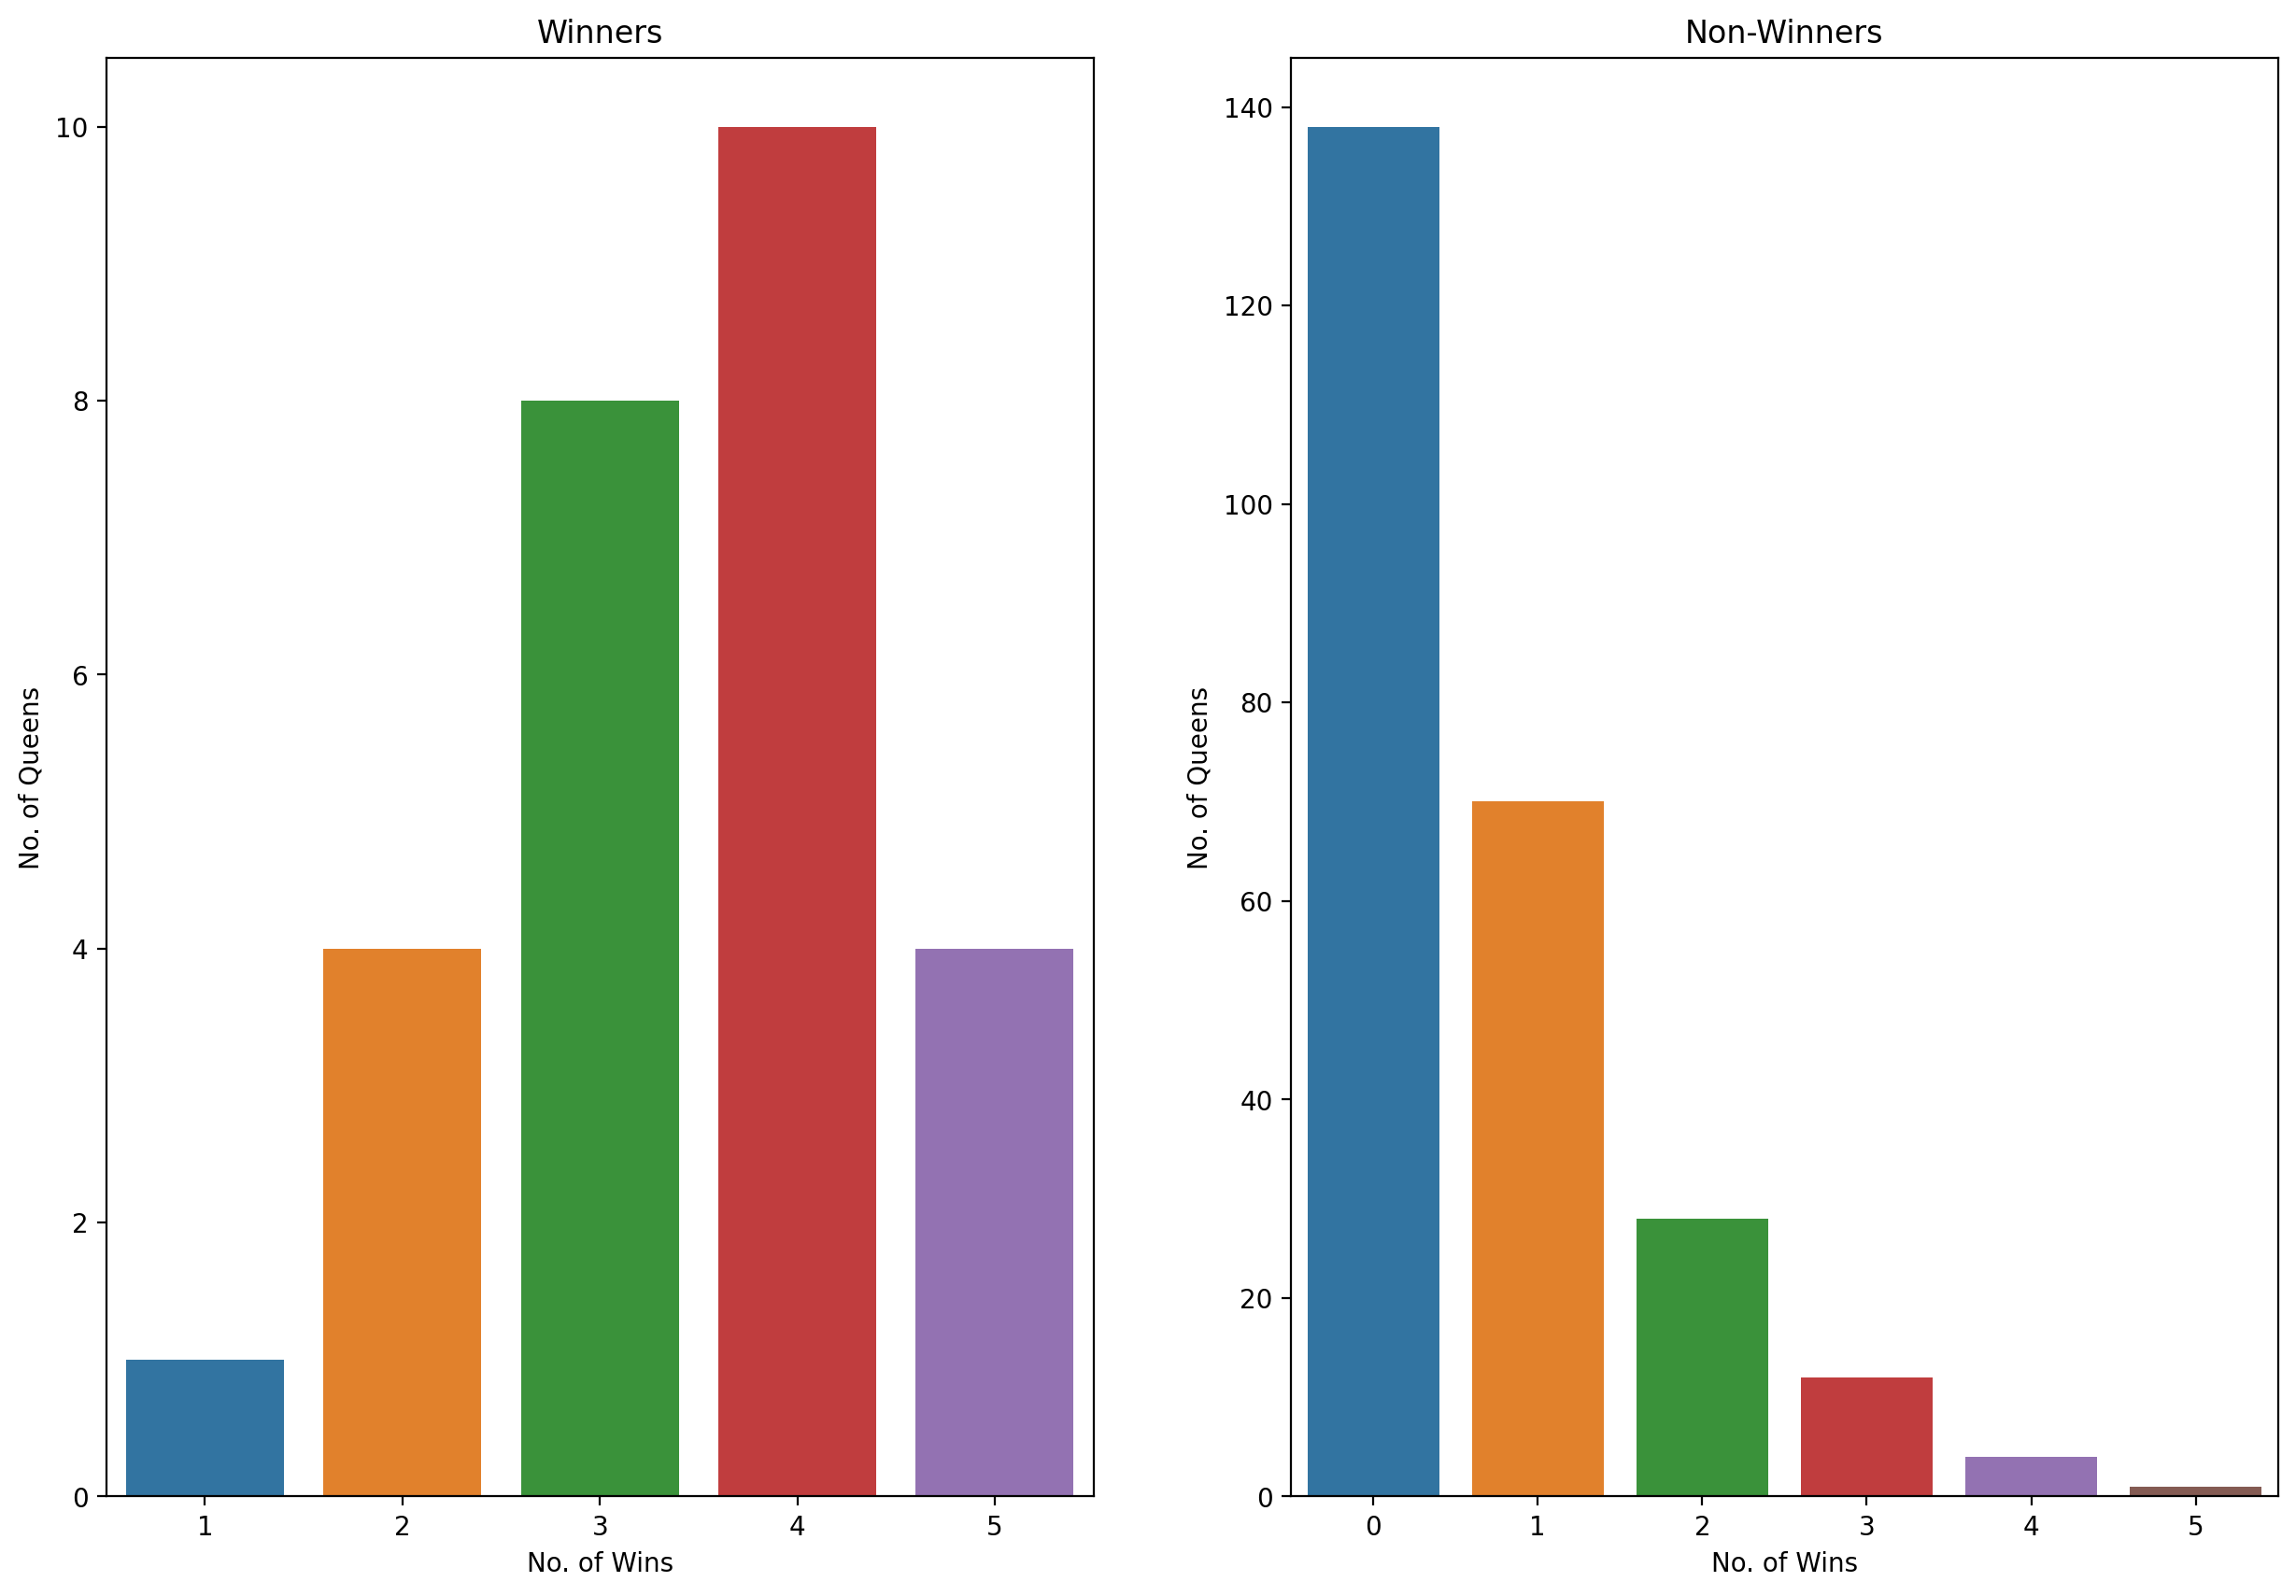

In [23]:
outcome_breakdown = train.groupby(['queen_name','winner']).outcome.value_counts()
breakdown = pd.DataFrame()
for index, value in outcome_breakdown.items():
    breakdown.loc[index[0],'winner'] = index[1]
    breakdown.loc[index[0],index[2]] = value
breakdown = breakdown.convert_dtypes()
fig, axs = plt.subplots(1,2,figsize=(15,10))
sns.countplot(data=breakdown[breakdown.winner],x='WIN',ax=axs[0])
sns.countplot(data=breakdown[~breakdown.winner],x='WIN',ax=axs[1])
axs[0].set_title('Winners')
axs[1].set_title('Non-Winners')
[ax.set_xlabel('No. of Wins') for ax in axs]
[ax.set_ylabel('No. of Queens') for ax in axs]
plt.show()

While winners tend to win more challenges than non-winners, some non-winners have won more challenges than the winners

## Do winners tend to win more mini-challenges?

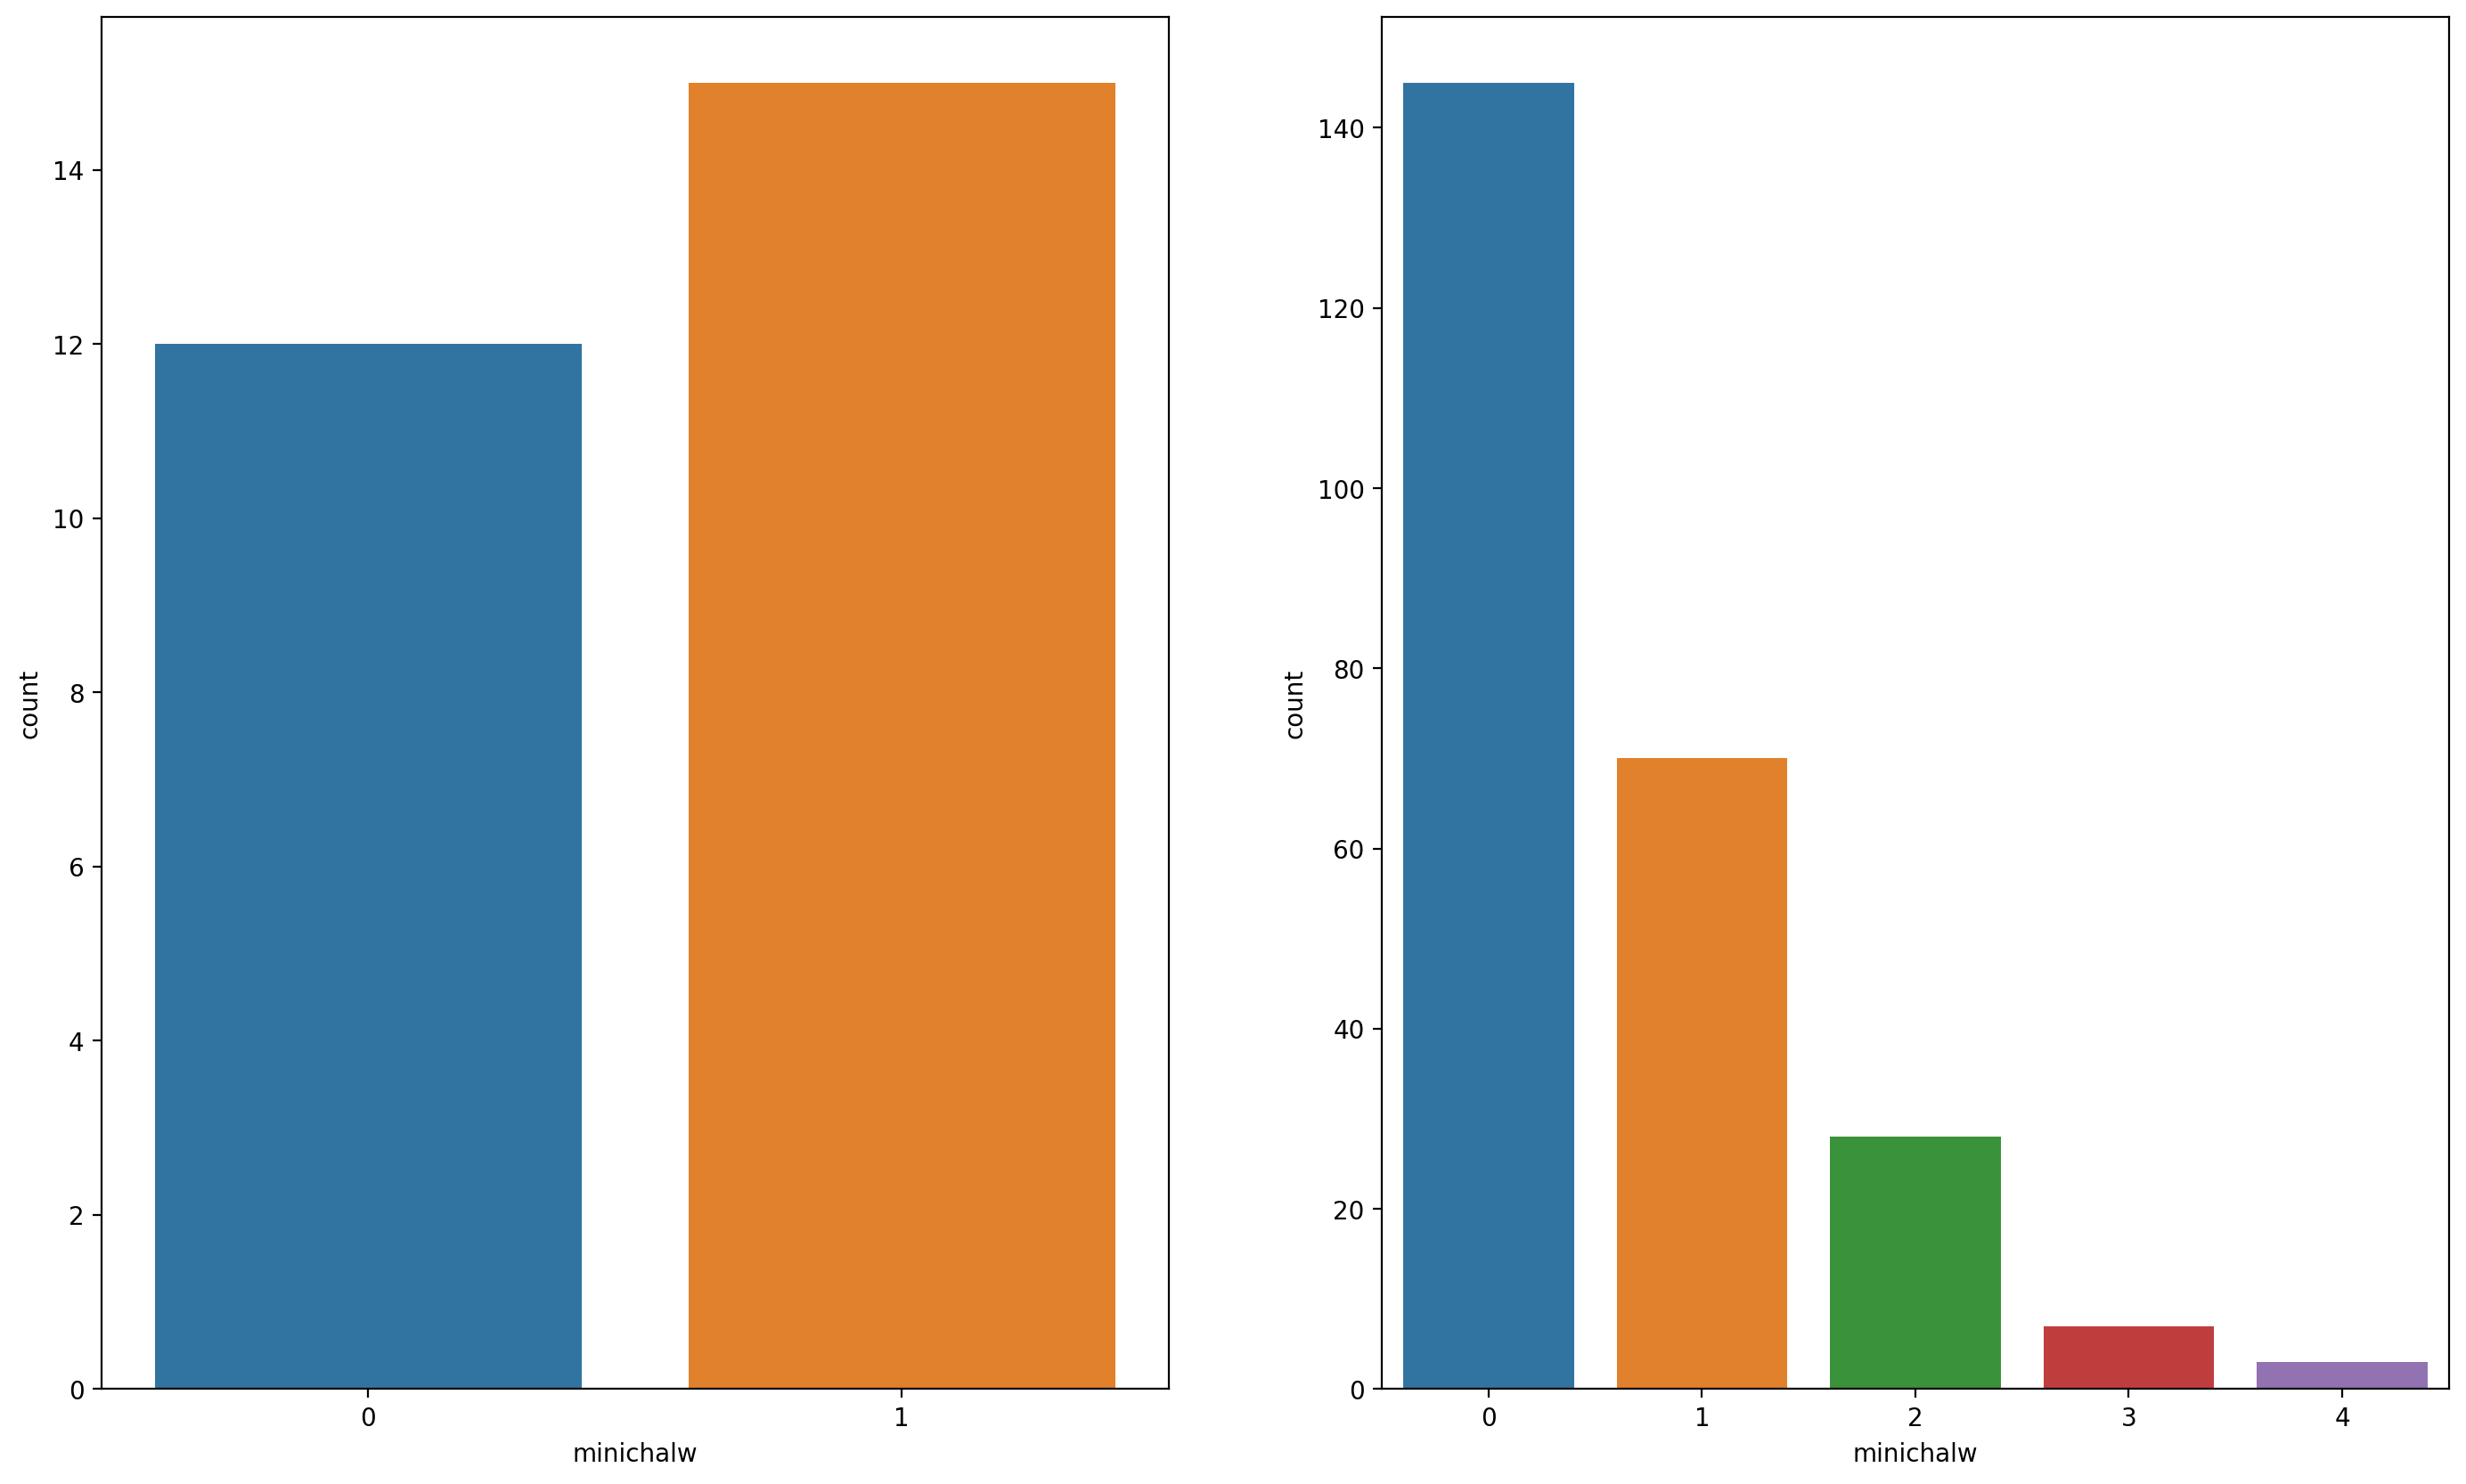

In [27]:
minichalw = train.groupby(['queen_name','winner']).minichalw.sum().reset_index()
fig, axs = plt.subplots(1,2,figsize=(17,10))
sns.countplot(data=minichalw[minichalw.winner],x='minichalw',ax=axs[0])
sns.countplot(data=minichalw[~minichalw.winner],x='minichalw',ax=axs[1])
plt.show()

Winners actually win FEWER mini-challenges than losers

In [ ]:
outcome_breakdown = train.groupby(['queen_name','winner']).outcome.value_counts()
breakdown = pd.DataFrame()
for index, value in outcome_breakdown.items():
    breakdown.loc[index[0],'winner'] = index[1]
    breakdown.loc[index[0],index[2]] = value
breakdown = breakdown.convert_dtypes()
fig, axs = plt.subplots(1,2,figsize=(15,10))
sns.countplot(data=breakdown[breakdown.winner],x='WIN',ax=axs[0])
sns.countplot(data=breakdown[~breakdown.winner],x='WIN',ax=axs[1])
axs[0].set_title('Winners')
axs[1].set_title('Non-Winners')
[ax.set_xlabel('No. of Wins') for ax in axs]
[ax.set_ylabel('No. of Queens') for ax in axs]
plt.show()